

# Project: Investigating the Brazilian medical appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row such as:

1. ‘ScheduledDay’ tells us on what day the patient set up their appointment.
2. ‘Neighborhood’ indicates the location of the hospital.
3. ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.


In [2]:
#Importing the necessary packages.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


The analysis of this Data set revolves around finding ways to achieve the following:

What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

<a id='wrangling'></a>
## Data Wrangling
Let us start the analysis by wrangling the data.

In [3]:
# Loading the data and printing out a few lines.
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
print(df.head())

      PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0        0      

The Data Frame contains the following information:
1. PatientId, AppointmentID, Gender, Scheduled Day, Appointment Day, Age are self-explanatory.
2. 'Neighbourhood' tells us the locality of the hospital.
3.  For columns like 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'SMS_received':
value 0 : indicates they don't/aren't a part of it.
value 1 : indicates they have/are a part of it.
4. Handcap has 5 distinct values:
0 : the person is not handicapped
1 : person has one dysfunctional limb.
2 : person has two dysfunctional limbs.
3 : person has three dysfunctional limbs.
4 : person has four dysfunctional limbs.
5. The last row 'No-show' suggests the following:
'No' means the patient turned up for the appointment while 
'Yes' means the patient did not turn up.
IN THE NEXT FEW STEPS, WE WILL BE INSPECTING THE DATA FRAME.

In [4]:
#Shape of the DataFrame, generates as tuple of (rows, columns)
df.shape

(110527, 14)

We can see from above that our data frame has 110527 rows and 14 columns.

In [5]:
#retrieving the information about the whole DataFrame to check for possible issues
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 9.7+ MB


As we see the information of the given data frame above, we find that:
1. There are no missing data.
2. However the data type of ScheduledDay is incorrect, it is a 'string' but it should be in the 'timestamp' format.
3. The last column 'No-show' says a 'No' when a patient actually makes a visit, while it says a 'Yes' in the reverse scenario. This can be confusing and hence needs to be corrected.
4. Also, we can drop the columns 'PatientID' and 'AppointmentID' as they don't impact the analysis.

In [6]:
#Cleaning the data
#Step1. Changing the data type of the column 'ScheduledDay'
pd.to_datetime(df.ScheduledDay)

0        2016-04-29 18:38:08+00:00
1        2016-04-29 16:08:27+00:00
2        2016-04-29 16:19:04+00:00
3        2016-04-29 17:29:31+00:00
4        2016-04-29 16:07:23+00:00
                    ...           
110522   2016-05-03 09:15:35+00:00
110523   2016-05-03 07:27:33+00:00
110524   2016-04-27 16:03:52+00:00
110525   2016-04-27 15:09:23+00:00
110526   2016-04-27 13:30:56+00:00
Name: ScheduledDay, Length: 110527, dtype: datetime64[ns, UTC]

In [7]:
#Step 2: Dropping the unnecessary columns
df.drop(['PatientId', 'AppointmentDay'], axis = 1, inplace =True)

In [8]:
df.head()

,AppointmentID,Gender,ScheduledDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,5642903,F,2016-04-29T18:38:08Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5642503,M,2016-04-29T16:08:27Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,5642549,F,2016-04-29T16:19:04Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,5642828,F,2016-04-29T17:29:31Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,5642494,F,2016-04-29T16:07:23Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [9]:
#Step 3: Making amends to the last column
df.rename(columns={'No-show': 'Did_patient_visit'}, inplace = True)
df['Did_patient_visit'] = df['Did_patient_visit'].apply(lambda x: True if x == 'No' else False) #'No' meant patient makes a visit.
print(df.head())


   AppointmentID Gender          ScheduledDay  Age      Neighbourhood  \
0        5642903      F  2016-04-29T18:38:08Z   62    JARDIM DA PENHA   
1        5642503      M  2016-04-29T16:08:27Z   56    JARDIM DA PENHA   
2        5642549      F  2016-04-29T16:19:04Z   62      MATA DA PRAIA   
3        5642828      F  2016-04-29T17:29:31Z    8  PONTAL DE CAMBURI   
4        5642494      F  2016-04-29T16:07:23Z   56    JARDIM DA PENHA   

   Scholarship  Hipertension  Diabetes  Alcoholism  Handcap  SMS_received  \
0            0             1         0           0        0             0   
1            0             0         0           0        0             0   
2            0             0         0           0        0             0   
3            0             0         0           0        0             0   
4            0             1         1           0        0             0   

   Did_patient_visit  
0               True  
1               True  
2               True  
3     

In [10]:
#Step 4: changing the column names to lowercase for easing out the analysis process.
df.rename(columns = lambda x : x.lower(), inplace = True)
df.head()

,appointmentid,gender,scheduledday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,did_patient_visit
0,5642903,F,2016-04-29T18:38:08Z,62,JARDIM DA PENHA,0,1,0,0,0,0,True
1,5642503,M,2016-04-29T16:08:27Z,56,JARDIM DA PENHA,0,0,0,0,0,0,True
2,5642549,F,2016-04-29T16:19:04Z,62,MATA DA PRAIA,0,0,0,0,0,0,True
3,5642828,F,2016-04-29T17:29:31Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,True
4,5642494,F,2016-04-29T16:07:23Z,56,JARDIM DA PENHA,0,1,1,0,0,0,True


In [11]:
#Let us carry out basic exploration to further inspect the DF.
df.describe()

,appointmentid,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received
count,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


As we can see from above that min age is -1 which is impossible. We need to correct that.

In [12]:
#Let us find out that particular row
df1 = df.query('age == -1')
print(df1)

       appointmentid gender          scheduledday  age neighbourhood  \
99832        5775010      F  2016-06-06T08:58:13Z   -1         ROMÃO   

       scholarship  hipertension  diabetes  alcoholism  handcap  sms_received  \
99832            0             0         0           0        0             0   

       did_patient_visit  
99832               True  


In [13]:
#let's drop the row.
df.drop(99832, inplace = True)

In [14]:
#Re-validating
df.describe()

,appointmentid,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received
count,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Text(0.5, 1.0, 'Number of People vs Hypertension')

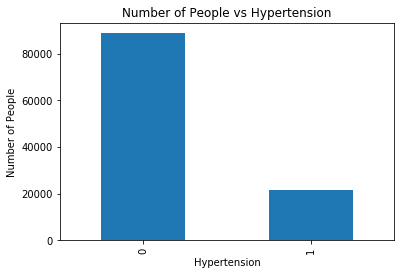

In [15]:
#Basic level exploration
df['hipertension'].value_counts().plot(kind = 'bar');
plt.xlabel("Hypertension")
plt.ylabel("Number of People")
plt.title("Number of People vs Hypertension")

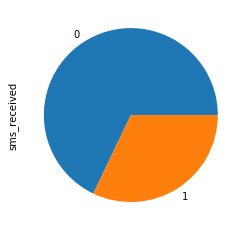

In [16]:
#Basic exploration
df['sms_received'].value_counts().plot(kind = 'pie');

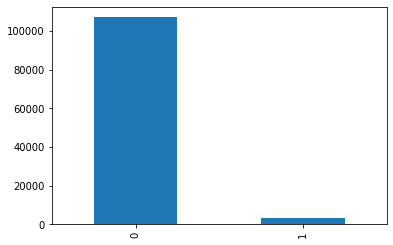

In [17]:
#Basic exploration
df['alcoholism'].value_counts().plot(kind = 'bar');

In [18]:
#How many localities are a part of this project
df.neighbourhood.nunique()

81

## DATA EXPLORATION

### Research Question 1 How many people visit the doctor on the scheduled day.
Let us address this basic question about the data.


In [19]:
#Step 1.0: Let us start by knowing the number of shows and no-shows for the appointment
df_population = df.groupby('did_patient_visit').age.count().reset_index() #We can chose any column to give us the right estimate.
df_population.rename(columns = {'age' : 'counts'}, inplace = True) #Renaming helps avoiding confusion.
df_population

,did_patient_visit,counts
0,False,22319
1,True,88207


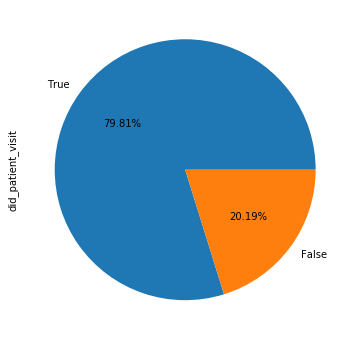

In [20]:
#Step 1.1: Pie chart depicting the percentage of shows and no-shows
df['did_patient_visit'].value_counts().plot(kind = 'pie', autopct = '%0.2f%%', figsize = (6,6));

In [21]:
# Step 2.0: Let us now segregate the male and female population
#Number of males and females
df_gender = df.groupby('gender').age.count().reset_index() 
df_gender.rename(columns ={'age' : 'counts'}, inplace = True) 
df_gender

,gender,counts
0,F,71839
1,M,38687


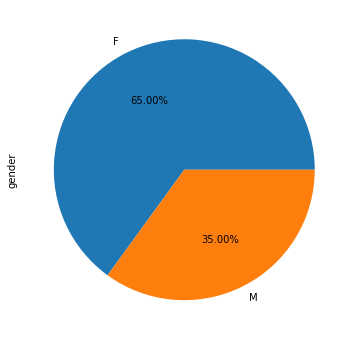

In [22]:
# Step 2.1: With the help of pie chart depicting the percentage of males and females in the total population
df['gender'].value_counts().plot(kind = 'pie', autopct = '%0.2f%%', figsize= (6,6));

In [23]:
#Step 3.0: Let us explore how many males and females turn up for appointment
number_of_people = df.groupby(['did_patient_visit', 'gender']).appointmentid.count().reset_index()
number_of_people.rename(columns ={'appointmentid' : 'counts'}, inplace = True)


#Step 3.1 :Pivoting the DataFrame for better readability and making operations easier.
number_of_people_pivot = number_of_people.pivot(columns = 'did_patient_visit',index = 'gender', values = 'counts')
print(number_of_people_pivot)

did_patient_visit  False  True 
gender                         
F                  14594  57245
M                   7725  30962


In [24]:
#Step 3.2: Percentage of males and females turning up for their appointments
show = number_of_people_pivot[True]/(number_of_people_pivot[True] + number_of_people_pivot[False])
print(show)

gender
F    0.796851
M    0.800321
dtype: float64


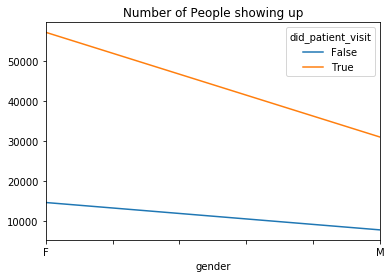

In [25]:
#Step 3.3 : Let's plot it on a graph
number_of_people_pivot.plot(title = 'Number of People showing up')

### Findings:
###### The number of people turning up for their scheduled appointment is around 80%.
###### The number of females in the given population of study is higher, there are 71839 females who make up 65% of the total population.
###### Almost equal percentage of males and females show up for their appointment (80%).

### Research Question 2 : Does the location of the hospital has an impact on the patient visits?


In [26]:
#Step 1.0 : In a quest to find any relation between the location of hospital and patient visit.
df_neighbour = df.groupby(['neighbourhood', 'did_patient_visit']).appointmentid.count().reset_index()
df_neighbour.rename(columns={'appointmentid' : 'counts'}, inplace = True)
print(df_neighbour)


       neighbourhood  did_patient_visit  counts
0          AEROPORTO              False       1
1          AEROPORTO               True       7
2         ANDORINHAS              False     521
3         ANDORINHAS               True    1741
4    ANTÔNIO HONÓRIO              False      50
..               ...                ...     ...
155       TABUAZEIRO               True    2559
156    UNIVERSITÁRIO              False      32
157    UNIVERSITÁRIO               True     120
158       VILA RUBIM              False     141
159       VILA RUBIM               True     710

[160 rows x 3 columns]


In [27]:
#Step 1.1 :Pivoting the DataFrame for easing out the analysis process
df_neighbour_pivot = df_neighbour.pivot(columns = 'did_patient_visit', index ='neighbourhood' , values = 'counts')
print(df_neighbour_pivot)


did_patient_visit    False   True 
neighbourhood                     
AEROPORTO              1.0     7.0
ANDORINHAS           521.0  1741.0
ANTÔNIO HONÓRIO       50.0   221.0
ARIOVALDO FAVALESSA   62.0   220.0
BARRO VERMELHO        91.0   332.0
...                    ...     ...
SÃO JOSÉ             428.0  1549.0
SÃO PEDRO            515.0  1933.0
TABUAZEIRO           573.0  2559.0
UNIVERSITÁRIO         32.0   120.0
VILA RUBIM           141.0   710.0

[81 rows x 2 columns]


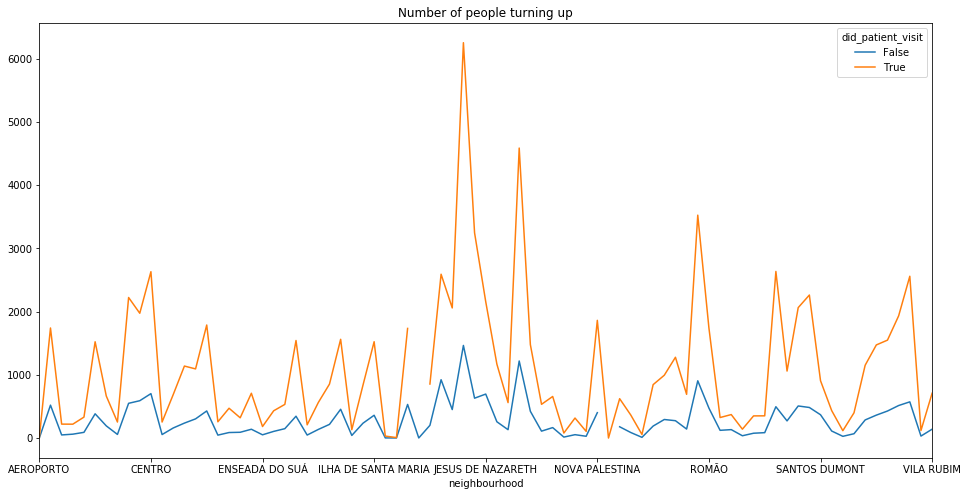

In [28]:
#Step 1.3: Let us plot the graph
df_neighbour_pivot.plot(title = 'Number of people turning up', figsize = (16,8))

In [29]:
#Step 1.4: Calculating the percentage of people making it to the appointment from each locality.
df_neighbour_pivot['percent'] = df_neighbour_pivot[True]/(df_neighbour_pivot[True] + df_neighbour_pivot[False])
df_neighbour_pivot.head()


did_patient_visit,False,True,percent
neighbourhood,,,
AEROPORTO,1.0,7.0,0.875000
ANDORINHAS,521.0,1741.0,0.769673
ANTÔNIO HONÓRIO,50.0,221.0,0.815498
ARIOVALDO FAVALESSA,62.0,220.0,0.780142
BARRO VERMELHO,91.0,332.0,0.784870


In [30]:
#Step 1.5: Extracting the locality that sees the least percentage of patient visits.
print(df_neighbour_pivot['percent'].min())
#let's extract this row
df_row_min = df_neighbour_pivot.query('percent == 0.7108150470219435')
print(df_row_min)

0.7108150470219435
did_patient_visit  False   True   percent
neighbourhood                            
SANTOS DUMONT      369.0  907.0  0.710815


In [31]:
#Step 1.6: Extracting the neighbourhood that sees the highest percentage of people promptly turning up for their appointments
print(df_neighbour_pivot['percent'].max())
#let's extract this row
df_row_max = df_neighbour_pivot.query('percent == 0.9142857142857143')
print(df_row_max)

0.9142857142857143
did_patient_visit  False  True   percent
neighbourhood                           
ILHA DO BOI          3.0  32.0  0.914286


In [32]:
#Step 1.7: As we can see above, max and min can lead to false interpretations as the number of people aren't the same for 
#each locality
df_neighbour_pivot.describe()

did_patient_visit,False,True,percent
count,80.000000,80.00000,79.000000
mean,278.987500,1102.58750,0.802030
std,278.000751,1096.25939,0.031694
min,1.000000,1.00000,0.710815
25%,75.000000,324.00000,0.783028
50%,184.500000,709.50000,0.802412
75%,428.250000,1605.00000,0.819724
max,1465.000000,6252.00000,0.914286


In [33]:
#Step 1.8 : Let us find the localities that are in the bottom 25% and will require some monitoring.
bin_edges0 = [0.710815, 0.783028, 0.914286]
bin_names0 = ['Monitor', 'No_need_to_monitor']
df_neighbour_pivot['Categorization'] = pd.cut(df_neighbour_pivot['percent'], bin_edges0, labels = bin_names0)

In [36]:
#Step 1.9 : Print
df_neighbour_pivot.head()

did_patient_visit,False,True,percent,Categorization
neighbourhood,,,,
AEROPORTO,1.0,7.0,0.875000,No_need_to_monitor
ANDORINHAS,521.0,1741.0,0.769673,Monitor
ANTÔNIO HONÓRIO,50.0,221.0,0.815498,No_need_to_monitor
ARIOVALDO FAVALESSA,62.0,220.0,0.780142,Monitor
BARRO VERMELHO,91.0,332.0,0.784870,No_need_to_monitor


### Research Question 3 : Age brackets
#### Which population group is gripped by which ailment.
#### Which age group shows up the most for appointments.
#### Which ailment causes the people to prompting show up for their appointment


In [37]:
#Step 1.0 :Using pandas cut function to categorize the age groups
bin_edges = [ 0.000000, 18.000000, 37.000000, 55.000000, 115.000000]

#Labels for the groups
bin_names = ['Child/Teen','Youth', 'Mid_age', 'elderly']

#This creates the new column
df['age_groups'] = pd.cut(df['age'], bin_edges, labels = bin_names)
print(df.head())

   appointmentid gender          scheduledday  age      neighbourhood  \
0        5642903      F  2016-04-29T18:38:08Z   62    JARDIM DA PENHA   
1        5642503      M  2016-04-29T16:08:27Z   56    JARDIM DA PENHA   
2        5642549      F  2016-04-29T16:19:04Z   62      MATA DA PRAIA   
3        5642828      F  2016-04-29T17:29:31Z    8  PONTAL DE CAMBURI   
4        5642494      F  2016-04-29T16:07:23Z   56    JARDIM DA PENHA   

   scholarship  hipertension  diabetes  alcoholism  handcap  sms_received  \
0            0             1         0           0        0             0   
1            0             0         0           0        0             0   
2            0             0         0           0        0             0   
3            0             0         0           0        0             0   
4            0             1         1           0        0             0   

   did_patient_visit  age_groups  
0               True     elderly  
1               True     eld

In [38]:
#Step 2.0: Checking for ailments : ail_1 = alcoholism
df_ail_1 = df.groupby(['alcoholism','age_groups']).gender.count().reset_index()
df_ail_1.rename(columns = {'gender' : 'counts'}, inplace = True)
print(df_ail_1)

   alcoholism  age_groups  counts
0           0  Child/Teen   25299
1           0       Youth   26694
2           0     Mid_age   25230
3           0     elderly   26404
4           1  Child/Teen      28
5           1       Youth     556
6           1     Mid_age    1676
7           1     elderly    1100


In [39]:
#Step 2.1: Filtering out the population affected due to alcoholism.
df_alch= df_ail_1.query('alcoholism == 1')
print(df_alch)

   alcoholism  age_groups  counts
4           1  Child/Teen      28
5           1       Youth     556
6           1     Mid_age    1676
7           1     elderly    1100


In [40]:
#Step 2.2: Let us dig a little depper and find out what percentage of males and females are affected by it
df_ail_1_gd = df.groupby(['gender', 'alcoholism', 'age_groups']).age.count().reset_index()
df_ail_1_gd.rename(columns ={'age' : 'counts'}, inplace = True)
print(df_ail_1_gd)

   gender  alcoholism  age_groups  counts
0       F           0  Child/Teen   13222
1       F           0       Youth   19504
2       F           0     Mid_age   17878
3       F           0     elderly   18291
4       F           1  Child/Teen      11
5       F           1       Youth     318
6       F           1     Mid_age     626
7       F           1     elderly     268
8       M           0  Child/Teen   12077
9       M           0       Youth    7190
10      M           0     Mid_age    7352
11      M           0     elderly    8113
12      M           1  Child/Teen      17
13      M           1       Youth     238
14      M           1     Mid_age    1050
15      M           1     elderly     832


In [41]:
#Step 2.3: Separating the dataframes for males and females 
df_ail_1f = df_ail_1_gd[(df_ail_1_gd.gender == "F") & (df_ail_1_gd.alcoholism == 1)]
print(df_ail_1f)
df_ail_1m = df_ail_1_gd[(df_ail_1_gd.gender == "M") & (df_ail_1_gd.alcoholism == 1)]
print(df_ail_1m)

  gender  alcoholism  age_groups  counts
4      F           1  Child/Teen      11
5      F           1       Youth     318
6      F           1     Mid_age     626
7      F           1     elderly     268
   gender  alcoholism  age_groups  counts
12      M           1  Child/Teen      17
13      M           1       Youth     238
14      M           1     Mid_age    1050
15      M           1     elderly     832


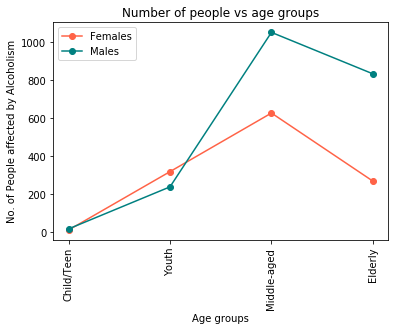

In [42]:
#Step 2.4: Plotting the graph
x_values = [0,1,2,3]
y_females = df_ail_1f.counts
y_males = df_ail_1m.counts

#Creating an axis


ax= plt.subplot()
ax.set_xticks([0,1,2,3])
ax.set_xticklabels(['Child/Teen','Youth', 'Middle-aged', 'Elderly'], rotation = 90)
plt.plot(x_values, y_females, color = 'Tomato', marker = 'o')
plt.plot(x_values, y_males,color = 'Teal', marker = 'o')
plt.xlabel('Age groups')
plt.ylabel('No. of People affected by Alcoholism')
plt.title('Number of people vs age groups')
plt.legend(['Females', 'Males'])



In [43]:
#Step 3.0 :Checking for hypertension
df_ail_2 = df.groupby(['hipertension','age_groups', 'gender']).age.count().reset_index()
df_ail_2.rename(columns={'age' : 'counts'}, inplace = True)
print(df_ail_2)

    hipertension  age_groups gender  counts
0              0  Child/Teen      F   13213
1              0  Child/Teen      M   12074
2              0       Youth      F   19017
3              0       Youth      M    7058
4              0     Mid_age      F   13898
5              0     Mid_age      M    6573
6              0     elderly      F    8651
7              0     elderly      M    4702
8              1  Child/Teen      F      20
9              1  Child/Teen      M      20
10             1       Youth      F     805
11             1       Youth      M     370
12             1     Mid_age      F    4606
13             1     Mid_age      M    1829
14             1     elderly      F    9908
15             1     elderly      M    4243


In [44]:
#Step 3.1: Filtering out the people who have hypertension
#Number of females who have hypertension:
df_ail_2f = df_ail_2[(df_ail_2.gender == "F") & (df_ail_2.hipertension == 1)]
print(df_ail_2f)

    hipertension  age_groups gender  counts
8              1  Child/Teen      F      20
10             1       Youth      F     805
12             1     Mid_age      F    4606
14             1     elderly      F    9908


In [45]:
#Step 3.2: Number of males who have hypertension:
df_ail_2m = df_ail_2[(df_ail_2.gender == "M") & (df_ail_2.hipertension == 1)]
print(df_ail_2m)

    hipertension  age_groups gender  counts
9              1  Child/Teen      M      20
11             1       Youth      M     370
13             1     Mid_age      M    1829
15             1     elderly      M    4243


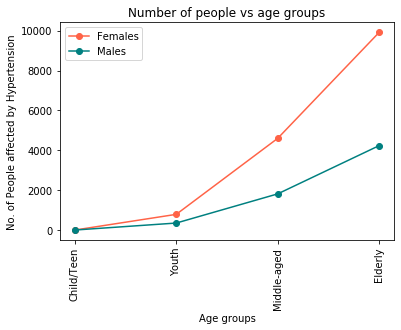

In [46]:
#Step 3.3: Plotting the graph
y_females_hyper = df_ail_2f.counts
y_males_hyper = df_ail_2m.counts




#creating the axes
ax1 = plt.subplot()
ax1.set_xticks([0,1,2,3])
ax1.set_xticklabels(['Child/Teen','Youth', 'Middle-aged', 'Elderly'], rotation = 90)
plt.plot(x_values, y_females_hyper, color = 'Tomato', marker = 'o')
plt.plot(x_values, y_males_hyper ,color = 'Teal', marker = 'o')
plt.xlabel('Age groups')
plt.ylabel('No. of People affected by Hypertension')
plt.title('Number of people vs age groups')
plt.legend(['Females', 'Males'])


In [47]:
#Step 4.0: Checking for diabetes
df_ail_3 = df.groupby(['diabetes','age_groups', 'gender']).age.count().reset_index()
df_ail_3.rename(columns={'age' : 'counts'}, inplace = True)
print(df_ail_3)

    diabetes  age_groups gender  counts
0          0  Child/Teen      F   13195
1          0  Child/Teen      M   12081
2          0       Youth      F   19574
3          0       Youth      M    7344
4          0     Mid_age      F   17098
5          0     Mid_age      M    7791
6          0     elderly      F   14645
7          0     elderly      M    7316
8          1  Child/Teen      F      38
9          1  Child/Teen      M      13
10         1       Youth      F     248
11         1       Youth      M      84
12         1     Mid_age      F    1406
13         1     Mid_age      M     611
14         1     elderly      F    3914
15         1     elderly      M    1629


In [48]:
#Step 4.1: Filtering out the people who have hypertension
#Number of females who have hypertension:
df_ail_3f = df_ail_3[(df_ail_3.gender == "F") & (df_ail_3.diabetes == 1)]
print(df_ail_3f)

    diabetes  age_groups gender  counts
8          1  Child/Teen      F      38
10         1       Youth      F     248
12         1     Mid_age      F    1406
14         1     elderly      F    3914


In [49]:
#Step 4.2: Number of males who have hypertension:
df_ail_3m = df_ail_3[(df_ail_3.gender == "M") & (df_ail_3.diabetes == 1)]
print(df_ail_3m)

    diabetes  age_groups gender  counts
9          1  Child/Teen      M      13
11         1       Youth      M      84
13         1     Mid_age      M     611
15         1     elderly      M    1629


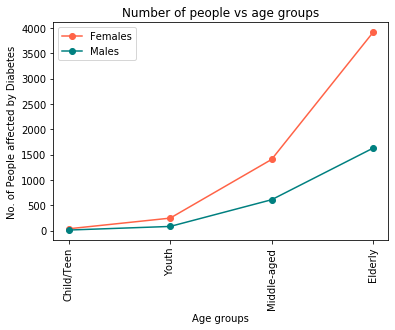

In [50]:
#Step 4.3: Plotting the graph
y_females_diab = df_ail_3f.counts
y_males_diab = df_ail_3m.counts




#creating the axes
ax2 = plt.subplot()
ax2.set_xticks([0,1,2,3])
ax2.set_xticklabels(['Child/Teen','Youth', 'Middle-aged', 'Elderly'], rotation = 90)
plt.plot(x_values, y_females_diab, color = 'Tomato', marker = 'o')
plt.plot(x_values, y_males_diab ,color = 'Teal', marker = 'o')
plt.xlabel('Age groups')
plt.ylabel('No. of People affected by Diabetes')
plt.title('Number of people vs age groups')
plt.legend(['Females', 'Males'])

In [51]:
#Step 5.0 : Checking for handcap
df_ail_4 = df.groupby(['handcap','age_groups']).age.count().reset_index()
df_ail_4.rename(columns={'age' : 'counts'}, inplace = True)
print(df_ail_4)


    handcap  age_groups  counts
0         0  Child/Teen   25061
1         0       Youth   26849
2         0     Mid_age   26337
3         0     elderly   26500
4         1  Child/Teen     219
5         1       Youth     363
6         1     Mid_age     533
7         1     elderly     926
8         2  Child/Teen      41
9         2       Youth      37
10        2     Mid_age      34
11        2     elderly      71
12        3  Child/Teen       4
13        3     Mid_age       2
14        3     elderly       7
15        4  Child/Teen       2
16        4       Youth       1


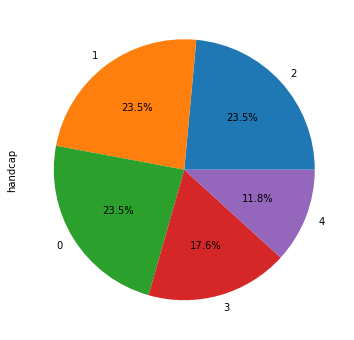

In [52]:
#Step 5.1: Finding out the percentage of people who are handcapped in different capacities 
df_ail_4['handcap'].value_counts().plot(kind = 'pie', autopct = '%0.1f%%', figsize = (6,6));

In [53]:
#Step 6.0 :Age group that promptly shows up for the appointments
df_group = df.groupby(['age_groups', 'did_patient_visit']).age.count().reset_index()
df_group.rename(columns={'age' : 'counts'}, inplace = True)
print(df_group)

   age_groups  did_patient_visit  counts
0  Child/Teen              False    5708
1  Child/Teen               True   19619
2       Youth              False    6414
3       Youth               True   20836
4     Mid_age              False    5255
5     Mid_age               True   21651
6     elderly              False    4303
7     elderly               True   23201


In [54]:
#Step 6.1: Filtering the Number of people who show up for the appointment
df_group_show = df_group.query('did_patient_visit == True')
print(df_group_show)

   age_groups  did_patient_visit  counts
1  Child/Teen               True   19619
3       Youth               True   20836
5     Mid_age               True   21651
7     elderly               True   23201


In [55]:
#Step 6.2: Number and categories of people who did not show up 
df_group_no_show = df_group.query('did_patient_visit == False')
print(df_group_no_show)

   age_groups  did_patient_visit  counts
0  Child/Teen              False    5708
2       Youth              False    6414
4     Mid_age              False    5255
6     elderly              False    4303


In [56]:
#Step 7.0: Number of people in different age categories who are enrolled under the program
df_prog = df.groupby(['scholarship', 'age_groups']).age.count().reset_index()
df_prog.rename(columns ={'age' : 'counts'}, inplace = True)
print(df_prog)

   scholarship  age_groups  counts
0            0  Child/Teen   22144
1            0       Youth   23536
2            0     Mid_age   23964
3            0     elderly   26534
4            1  Child/Teen    3183
5            1       Youth    3714
6            1     Mid_age    2942
7            1     elderly     970


In [57]:
#Step 7.1: Filtering out the people who are enrolled
df_prog_1 = df_prog.query('scholarship == 1')
print(df_prog_1)
y_prog = df_prog_1.counts

   scholarship  age_groups  counts
4            1  Child/Teen    3183
5            1       Youth    3714
6            1     Mid_age    2942
7            1     elderly     970


In [58]:
#Step 8.0: People who received SMS
df_sms = df.groupby(['sms_received', 'age_groups']).age.count().reset_index()
df_sms.rename(columns ={'age' : 'counts'}, inplace = True)
print(df_sms)

   sms_received  age_groups  counts
0             0  Child/Teen   17775
1             0       Youth   17932
2             0     Mid_age   17908
3             0     elderly   18787
4             1  Child/Teen    7552
5             1       Youth    9318
6             1     Mid_age    8998
7             1     elderly    8717


In [59]:
#Step 8.1: Filtering
df_sms_1 = df_sms.query('sms_received == 1')
print(df_sms_1)
y_sms = df_sms_1.counts

   sms_received  age_groups  counts
4             1  Child/Teen    7552
5             1       Youth    9318
6             1     Mid_age    8998
7             1     elderly    8717


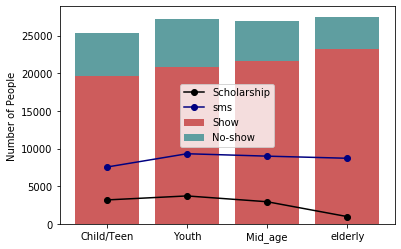

In [60]:
#Step 8.2 : PLotting stacked bar chart that depicts the number of people who showed up and the ones who didn't.

y_show = [19619, 20836, 21651, 23201]
ax4 = plt.subplot()
ax4.set_xticks(x_values)
ax4.set_xticklabels(bin_names)
plt.bar(range(len(bin_names)), y_show, color = 'IndianRed')
y_no_show = [5708, 6414, 5255, 4303]

plt.bar(range(len(bin_names)), y_no_show, bottom = y_show, color = 'CadetBlue')
plt.ylabel('Number of People')

#Plotting the line graph which shows the number of people enrolled in the program.
plt.plot(range(len(bin_names)), y_prog, color = 'black', marker = 'o')
plt.plot(range(len(bin_names)), y_sms, color = 'Navy', marker = 'o')
plt.legend(['Scholarship', 'sms','Show','No-show'], loc = 10)


### FINDINGS
The above graph shows a stacked bar chart with the number of people showing up for the appointments and the one's who did not.
The line graphs in black and blue help us understand how many of these were a part of the health benefit scheme and how many of those received sms reminders.
1. The highest number of people who show up promptly for the appointment are the elderly. This is despite the fact that this group has the least number of beneficiaries of the health program.
2. Youths are the one's who skip their appointments the most though they received the most number of sms reminders.

### Research Question 4: Which conditions (in the form of sms, health program or any ailments)  sees the most number of people visiting on their scheduled dates.

In [61]:
#Step 1.0 :Let us start addressing this question by segregating people on the basis of their enrollment for health program
df_sch = df.groupby(['scholarship', 'did_patient_visit']).age.count().reset_index()
df_sch.rename(columns = {'age' : 'counts'}, inplace = True)
df_sch


,scholarship,did_patient_visit,counts
0,0,False,19741
1,0,True,79924
2,1,False,2578
3,1,True,8283


In [62]:
#Step 1.1: Filtering out the people who are enrolled in the program 
df_sch_show = df_sch.query('scholarship == 1').reset_index()


#Creating a variable for plotting on graph
y_sum_show = [] 
y_sum_show.append(df_sch_show.counts[1]) #Number of people who are enrolled and turn up for the appointment.
print(y_sum_show)

y_sum_no_show = []
y_sum_no_show.append(df_sch_show.counts[0])
print(y_sum_no_show)

[8283]
[2578]


In [63]:
#Step 2.0: People who have alcholism and show up for the appointment
df_alcoholism = df.groupby(['alcoholism', 'did_patient_visit']).age.count().reset_index()
df_alcoholism.rename(columns = {'age' : 'counts'}, inplace = True)
df_alcoholism

,alcoholism,did_patient_visit,counts
0,0,False,21642
1,0,True,85524
2,1,False,677
3,1,True,2683


In [64]:
#Step 2.1: Filtering out the people who are affected by alcoholism and make it up to the appointment
df_alcoholism_show = df_alcoholism.query('alcoholism ==1').reset_index()
df_alcoholism_show

,index,alcoholism,did_patient_visit,counts
0,2,1,False,677
1,3,1,True,2683


In [65]:
#Step 2.2: Storing values to be used in plotting the summary graph
y_sum_show.append(df_alcoholism_show.counts[1]) #Number of people who are alcoholics and turn up
print(y_sum_show)

y_sum_no_show.append(df_alcoholism_show.counts[0]) #Number of people who are alcoholics and don't turn up
print(y_sum_no_show)

[8283, 2683]
[2578, 677]


In [66]:
#Step 3.0: People who have diabetes and show up for the appointment
df_dia = df.groupby(['diabetes', 'did_patient_visit']).age.count().reset_index()
df_dia.rename(columns={'age' : 'counts'}, inplace = True)

In [67]:
#Step 3.1: Filtering 
df_dia_show = df_dia.query('diabetes == 1').reset_index()
df_dia_show

,index,diabetes,did_patient_visit,counts
0,2,1,False,1430
1,3,1,True,6513


In [68]:
#Step 3.2: Appending the values of patients turning up in the above created variables
y_sum_show.append(df_dia_show.counts[1]) #Number of people who are alcoholics and turn up
print(y_sum_show)

y_sum_no_show.append(df_dia_show.counts[0]) #Number of people who are alcoholics and don't turn up
print(y_sum_no_show)

[8283, 2683, 6513]
[2578, 677, 1430]


In [69]:
#Step 4.0: Number of People who are suffering from hypertension showing up for the appointment
df_hyper = df.groupby(['hipertension','did_patient_visit']).age.count().reset_index()
df_hyper.rename(columns ={'age' : 'counts'}, inplace = True)
df_hyper

,hipertension,did_patient_visit,counts
0,0,False,18547
1,0,True,70178
2,1,False,3772
3,1,True,18029


In [70]:
#Step 4.1: Filtering out the where hypertension = 1
df_hyper_show = df_hyper.query('hipertension == 1').reset_index()
df_hyper_show

,index,hipertension,did_patient_visit,counts
0,2,1,False,3772
1,3,1,True,18029


In [71]:
#Step 4.2: Appending the number of patients suffering from hypertension and turning up in the above created variables
y_sum_show.append(df_hyper_show.counts[1]) #Number of people who are alcoholics and turn up
print(y_sum_show)

y_sum_no_show.append(df_hyper_show.counts[0]) #Number of people who are alcoholics and don't turn up
print(y_sum_no_show)

[8283, 2683, 6513, 18029]
[2578, 677, 1430, 3772]


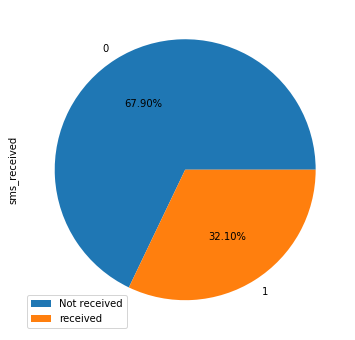

In [72]:
#Step 5.0 : Let us now start looking at the population who received the sms reminding them of their visit.
df['sms_received'].value_counts().plot(kind = 'pie', autopct = '%0.2f%%', figsize = (6,6));
plt.legend(['Not received', 'received'])

In [73]:
#Step 5.1 :Number of people who received the sms and made a visit
df_sms = df.groupby(['sms_received', 'did_patient_visit']).age.count().reset_index()
df_sms.rename(columns={'age' : 'counts'}, inplace = True)
print(df_sms)

   sms_received  did_patient_visit  counts
0             0              False   12535
1             0               True   62509
2             1              False    9784
3             1               True   25698


In [74]:
#Step 5.2 : Let us filter the people who received the sms
df_sms_filter = df_sms.query('sms_received == 1').reset_index()
df_sms_filter

,index,sms_received,did_patient_visit,counts
0,2,1,False,9784
1,3,1,True,25698


In [75]:
#Step 5.3: Appening the appropriate values in the two variables created.
y_sum_show.append(df_sms_filter.counts[1])
y_sum_no_show.append(df_sms_filter.counts[0])

In [76]:
#Step 5.4
print(y_sum_show, y_sum_no_show)

[8283, 2683, 6513, 18029, 25698] [2578, 677, 1430, 3772, 9784]


C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


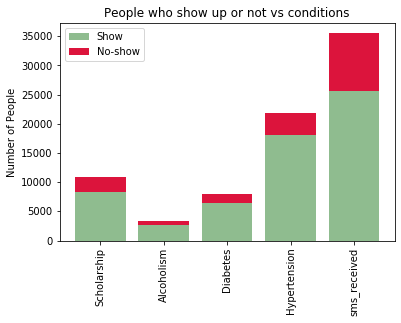

In [77]:
#Plotting stacked bar chart
x_plot = [0,1,2,3,4]
plt.bar(x_plot, y_sum_show, color = 'DarkSeaGreen')
plt.bar(x_plot, y_sum_no_show, bottom = y_sum_show, color = 'Crimson')

#Adding labels, ticks and legend
ax5 = plt.subplot()
ax5.set_xticks(x_plot)
ax5.set_xticklabels(['Scholarship', 'Alcoholism', 'Diabetes', 'Hypertension', 'sms_received'], rotation = 90)
plt.ylabel('Number of People')
plt.title('People who show up or not vs conditions')
plt.legend(['Show', 'No-show'])


### FINDINGS:
1. Nudges: As we can see from the above graph that even though people received sms reminders, they did not visit their doctors.
2. Ailments : People who have hypertension form the next highest category of patients who do not show up for their appointments.

# Conclusion
## Summary of statistical findings
Factors that help us predict whether the patient will turn up for the appointment or not:
#### On a general note:
1. 79.81% of the people turn up on the scheduled day of their appointments.
2. 20.19% of the people won't turn up.


#### Depending on 'gender':
3. The population under study comprises of 65% females and 35% males.
4. Percentage of females who show up for their appointment with the doctor : 79.68%
5. Percentage of males who show up for their appointment with the doctor : 80.03%

Hence we see that both males and females are equally-likely to visit the hospital on the scheduled day.

#### The locality factor:
The hospitals are located in 81 unique localities.
6. There are hospitals where the attendance of patients is on the lower side as compared to the rest (between 71 -78 %) and might need monitoring. Whereas there are localities in which hospitals see high patient turn outs (highest being around 91%).

### Age:
The mean and median age of the population under study is 37 years. 
For the sake of analysis, we have created 4 age categories:

0-18 : Child/Teen

18-37 : Youth

37-55 : Mid-aged

55-115 : Elderly

The age group that :

 Has the most number of people suffereing from alcoholism : middle aged men 
 Has the most number of people suffering from hypertension and diabetes : Middle aged and elderly women 

7. The age group that most promptly makes scheduled visit is the elderly. On the other hand, the youth needs nudging as they form the category that misses their appointments the most.
 



### LIMITATIONS :
1. The data set has a lot of categorical variables. There is only up to a point that high level statistical analysis can be performed on them.
2. We have mostly worked around descriptive statistics, for our analysis to be deeper : we need inferential tools. Regression models and sampling distributions can give us better insights about the dataset.
3. There can be a lot of inter-dependencies between the data. We can at times establish a correlation between two variables but that may not signify causality.
4. Also, we cannot eliminate the possibility of hidden variables. Hidden variables are those that are correlated with two variables who are in-turn not fundamentally related to each-other. This can sometimes lead to wrong causality linkages.